In [1]:
import requests
import numpy as np
import json
import pandas as pd
from pprint import pprint

from config import api_key
from matplotlib import pyplot as plt

In [2]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0'],"startyear":"2014", "endyear":"2023"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
print(json_data)

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 185, 'message': [], 'Results': {'series': [{'seriesID': 'CUUR0000SA0', 'data': [{'year': '2023', 'period': 'M12', 'periodName': 'December', 'value': '306.746', 'footnotes': [{}]}, {'year': '2023', 'period': 'M11', 'periodName': 'November', 'value': '307.051', 'footnotes': [{}]}, {'year': '2023', 'period': 'M10', 'periodName': 'October', 'value': '307.671', 'footnotes': [{}]}, {'year': '2023', 'period': 'M09', 'periodName': 'September', 'value': '307.789', 'footnotes': [{}]}, {'year': '2023', 'period': 'M08', 'periodName': 'August', 'value': '307.026', 'footnotes': [{}]}, {'year': '2023', 'period': 'M07', 'periodName': 'July', 'value': '305.691', 'footnotes': [{}]}, {'year': '2023', 'period': 'M06', 'periodName': 'June', 'value': '305.109', 'footnotes': [{}]}, {'year': '2023', 'period': 'M05', 'periodName': 'May', 'value': '304.127', 'footnotes': [{}]}, {'year': '2023', 'period': 'M04', 'periodName': 'April', 'value': '303.363', 'footnotes

In [3]:
for series in json_data['Results']['series']:
    seriesid = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
from pprint  import pprint
pprint(json_data)

{'Results': {'series': [{'data': [{'footnotes': [{}],
                                   'period': 'M12',
                                   'periodName': 'December',
                                   'value': '306.746',
                                   'year': '2023'},
                                  {'footnotes': [{}],
                                   'period': 'M11',
                                   'periodName': 'November',
                                   'value': '307.051',
                                   'year': '2023'},
                                  {'footnotes': [{}],
                                   'period': 'M10',
                                   'periodName': 'October',
                                   'value': '307.671',
                                   'year': '2023'},
                                  {'footnotes': [{}],
                                   'period': 'M09',
                                   'periodName': 'September',
           

In [4]:
# create DataFrame to hold values
resultsDF = pd.DataFrame(series['data'])
del resultsDF['footnotes']
del resultsDF['periodName']
resultsDF['period'] = resultsDF['period'].str.replace('M','')
resultsDF = resultsDF.rename(columns={'period': 'month'})
resultsDF.head()

,year,month,value
0,2023,12,306.746
1,2023,11,307.051
2,2023,10,307.671
3,2023,09,307.789
4,2023,08,307.026


In [5]:
resultsDF['monthYear'] = pd.to_datetime(resultsDF['month'].astype(str) + '-' + resultsDF['year'].astype(str), format='%m-%Y')

del resultsDF['month']

resultsDF.sort_values(by=['monthYear'],inplace=True)
resultsDF

,year,value,monthYear
119,2014,233.916,2014-01-01
118,2014,234.781,2014-02-01
117,2014,236.293,2014-03-01
116,2014,237.072,2014-04-01
115,2014,237.900,2014-05-01
...,...,...,...
4,2023,307.026,2023-08-01
3,2023,307.789,2023-09-01
2,2023,307.671,2023-10-01
1,2023,307.051,2023-11-01


In [6]:
# change dtype
resultsDF['value'] = resultsDF['value'].astype(float)
resultsDF.dtypes

year                 object
value               float64
monthYear    datetime64[ns]
dtype: object

In [7]:
# add average column and plot those points
average = resultsDF.groupby('year')['value'].mean()

average

year
2014    236.736167
2015    237.017000
2016    240.007167
2017    245.119583
2018    251.106833
2019    255.657417
2020    258.811167
2021    270.969750
2022    292.654917
2023    304.701583
Name: value, dtype: float64

In [8]:
averageDF = pd.DataFrame(
    {
        "year": ["2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"],
        "Avg Change CPI": average
    }
)
averageDF.head()

,year,Avg Change CPI
year,,
2014,2014,236.736167
2015,2015,237.017000
2016,2016,240.007167
2017,2017,245.119583
2018,2018,251.106833


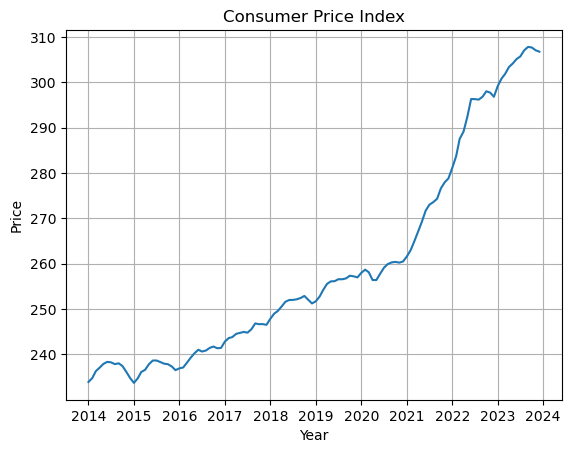

In [9]:
plt.title("Consumer Price Index")
plt.xlabel("Year")
plt.ylabel("Price")

plt.plot(resultsDF['monthYear'], resultsDF['value'])
plt.yticks()
plt.grid()
plt.show()

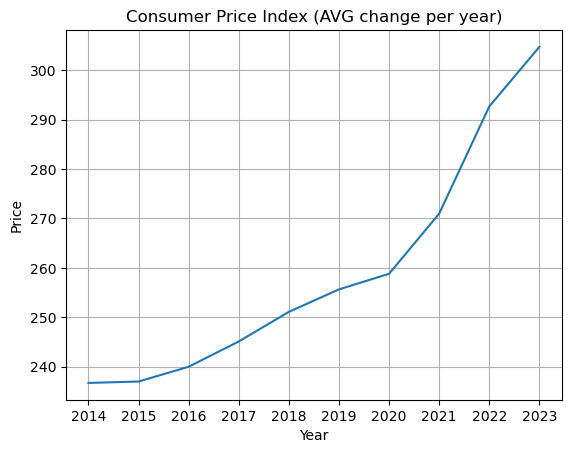

In [10]:
plt.title("Consumer Price Index (AVG change per year)")
plt.xlabel("Year")
plt.ylabel("Price")

plt.plot(averageDF['year'], averageDF['Avg Change CPI'])
plt.yticks()
plt.grid()
plt.show()

In [11]:
resultsDF.to_pickle('resultsDF.pkl')